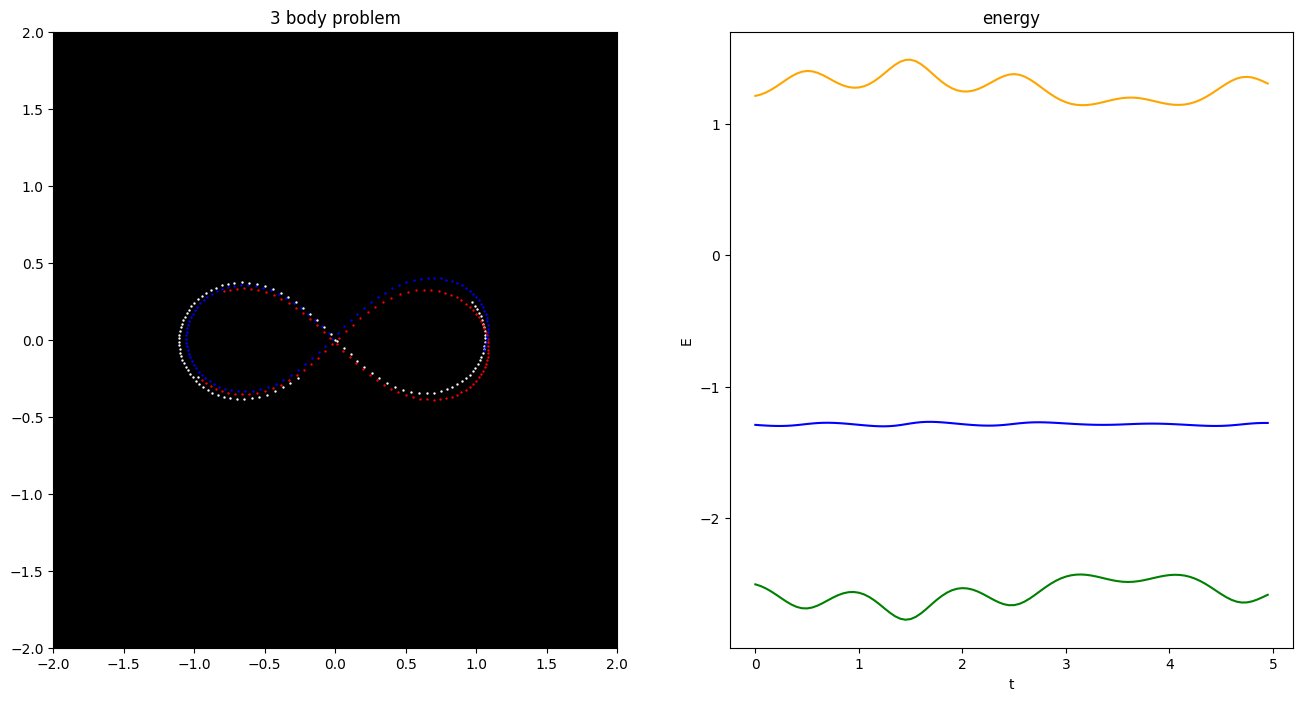

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

G = 1

#Three body problem simple simulation. Kevin Eisenberg, 11/9,10/2024
#Do not run on jupyter notebook, it will not work (plt pause). Run on a proper environment (made in VS code)

#FORM OF FORCES: F12 MEANS FORCE ON 1 DUE TO 2 (1->2)

class Planet():
    def __init__(self,mass,pos,radius=0.1,v=[0,0]): #pos is a tuple (x,y), velocity is a tuple
        self.mass = mass
        self.pos = np.array(pos,dtype=float) #dtype prevents errors down the road
        self.v = np.array(v,dtype=float)
        self.radius = radius
    
def gravity_acceleration(planet1,planet2):
    
    d = planet2.pos - planet1.pos #displacement vector
    
    r = np.linalg.norm(d)
    if r <= (planet1.radius + planet2.radius):
        raise ValueError('Collision has occurred!')
    magnitude = (G*planet1.mass*planet2.mass)/r**2
    
    vector = magnitude * d/r #magnitude in the unit direction of r, r/|r|
    a = vector/planet1.mass

    return a

def update_position(planet,dt):
    planet.pos += planet.v*dt

def KE(planets):
    KE = 0
    for planet in planets:
        KE += 0.5*planet.mass*np.linalg.norm(planet.v)**2
    return KE

def U(planets):
    U = 0
    for i in range(len(planets)):
        for j in range(i+1,len(planets)):
            U -= G*planets[i].mass*planets[j].mass/np.linalg.norm(planets[i].pos - planets[j].pos)
    return U

def setup(planetList):
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
    ax1.set_ylim((-2,2))
    ax1.set_xlim((-2,2))
    ax1.set_title('3 body problem')
    ax1.set_facecolor('black')
    for planet in planetList:
        ax1.scatter(planet.pos[0],planet.pos[1],c='w',s=planet.radius*5)
    
    ax2.set_title('energy')
    ax2.set_xlabel('time')
    ax2.set_ylabel('energy')
    ax2.set_ylim((-1000,1000))
    ax2.set_xlim((0,100))
    K0 = KE(planetList)
    U0 = U(planetList)
    ax2.scatter(0,K0,c='b')
    ax2.scatter(0,U0,c='r')
    ax2.scatter(0,K0+U0,c='g')
    
    return fig,ax1,ax2
    

def animate(planet1,planet2,planet3,dt,iterations,ax1,ax2):
    kinetic = []
    potential = []
    fig = plt.gcf()
    
    for iteration in range(iterations):

        a12 = gravity_acceleration(planet1,planet2)
        a21 = gravity_acceleration(planet2,planet1)
        a13 = gravity_acceleration(planet1,planet3)
        a31 = gravity_acceleration(planet3,planet1)
        a23 = gravity_acceleration(planet2,planet3)
        a32 = gravity_acceleration(planet3,planet2)

        planet1.v += a12*dt
        planet2.v += a21*dt
        planet1.v += a13*dt
        planet3.v += a31*dt
        planet2.v += a23*dt
        planet3.v += a32*dt

        update_position(planet1,dt)
        update_position(planet2,dt)
        update_position(planet3,dt)

        #ax1.clear()
        ax1.set_ylim((-2,2))
        ax1.set_xlim((-2,2))
        ax1.scatter(planet1.pos[0],planet1.pos[1],color='white',s=planet1.radius*5)
        ax1.scatter(planet2.pos[0],planet2.pos[1],color='red',s=planet2.radius*5)
        ax1.scatter(planet3.pos[0],planet3.pos[1],color='blue',s=planet3.radius*5)

        Kt = KE([planet1, planet2, planet3])
        Ut = U([planet1, planet2, planet3])
        kinetic.append(Kt)
        potential.append(Ut)

        ax2.clear()  #clear
        ax2.plot(np.arange(iteration+1)*dt,kinetic,label='KE',c='orange') #arange is not inclusive
        ax2.plot(np.arange(iteration+1)*dt,potential,label='Ug',c='g')
        ax2.plot(np.arange(iteration+1)*dt,np.array(kinetic)+np.array(potential),label='ET',c='b')
        ax2.set_xlabel('t')
        ax2.set_ylabel('E')
        ax2.set_title('energy')
        #plt.pause(0.01)
        clear_output(wait=True)
        display(fig)
        time.sleep(0.001)
        ax2.legend()
    
    plt.close(fig)
    
       
#--------------------------------------------
sun = Planet(1,(0.970, 0.243),radius=0.1,v=[0.466, -0.4320])
mars = Planet(1,(-0.970, -0.243),radius=0.1,v=[0.466, -0.432])
moon = Planet(1,(0.0, 0.0),radius=0.1,v=[-2 * 0.466, 2 * 0.432])

fig,ax1,ax2=setup([sun,mars,moon])
animate(sun,mars,moon,0.05,100,ax1,ax2)


